# Full TMDb TV Shows Dataset 2024

Goal: 
- Analyze IMDB TV Shows dataset to predict show popularity and enhance recommendations. 
- Give insights on factors influencing TV show popularity
- Common themes in highly rated movies
Ultimately, we want to predict a show's popularity based off of the given attributes.

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Import the TMDb data into pandas dataframe

In [11]:
TMDB_filename = os.path.join(os.getcwd(), "TMDB_tv_dataset_v3.csv")
df = pd.read_csv(TMDB_filename)

#### Explore the data

In [12]:
df.head(10)

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45
5,69050,Riverdale,7,137,en,13180,8.479,"Set in the present, the series offers a bold, ...",False,/soQgquPkLmUu9eKLJJzuA4KZDyi.jpg,...,"To save the future, they must survive the past.","Crime, Drama, Mystery",Roberto Aguirre-Sacasa,en,The CW,US,English,"Warner Bros. Television, Berlanti Productions,...",United States of America,45
6,93405,Squid Game,2,9,ko,13053,7.831,Hundreds of cash-strapped players accept a str...,False,/2meX1nMdScFOoV4370rqHWKmXhY.jpg,...,45.6 billion won is child's play,"Action & Adventure, Mystery, Drama",Hwang Dong-hyuk,"en, ko, ur",Netflix,KR,"English, 한국어/조선말, اردو","Siren Pictures, Firstman Studio",South Korea,0
7,1396,Breaking Bad,5,62,en,12398,8.890,"When Walter White, a New Mexico chemistry teac...",False,/tsRy63Mu5cu8etL1X7ZLyf7UP1M.jpg,...,Change the equation.,"Drama, Crime",Vince Gilligan,"en, de, es",AMC,US,"English, Deutsch, Español","Sony Pictures Television Studios, High Bridge ...",United States of America,0
8,71712,The Good Doctor,6,116,en,11768,8.503,"Shaun Murphy, a young surgeon with autism and ...",False,/xXRsKNJHTOGrs5wfYAxkbM2RiyT.jpg,...,Everyone operates differently.,Drama,David Shore,en,ABC,US,English,"ABC Studios, 3AD, Sony Pictures Television Stu...",United States of America,43
9,85271,WandaVision,1,9,en,11308,8.300,Wanda Maximoff and Vision—two super-powered be...,False,/lOr9NKxh4vMweufMOUDJjJhCRHW.jpg,...,Experience a new vision of reality.,"Sci-Fi & Fantasy, Mystery, Drama",Jac Schaeffer,en,Disney+,US,English,Marvel Studios,United States of America,0


In [13]:
df.dtypes

id                        int64
name                     object
number_of_seasons         int64
number_of_episodes        int64
original_language        object
vote_count                int64
vote_average            float64
overview                 object
adult                      bool
backdrop_path            object
first_air_date           object
last_air_date            object
homepage                 object
in_production              bool
original_name            object
popularity              float64
poster_path              object
type                     object
status                   object
tagline                  object
genres                   object
created_by               object
languages                object
networks                 object
origin_country           object
spoken_languages         object
production_companies     object
production_countries     object
episode_run_time          int64
dtype: object

In [14]:
df.shape

(168639, 29)

In [15]:
df_new = df.select_dtypes(exclude=['object'])
df_new['adult'] = df['adult'].astype(int)
df_new['in_production'] = df['in_production'].astype(int)
df_new

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,in_production,popularity,episode_run_time
0,1399,8,73,21857,8.442,0,0,1083.917,0
1,71446,3,41,17836,8.257,0,0,96.354,70
2,66732,4,34,16161,8.624,0,1,185.711,0
3,1402,11,177,15432,8.121,0,0,489.746,42
4,63174,6,93,13870,8.486,0,0,416.668,45
...,...,...,...,...,...,...,...,...,...
168634,239099,1,1,0,0.000,0,1,1.400,0
168635,241205,1,1,0,0.000,0,0,0.600,0
168636,240696,1,1,0,0.000,0,1,1.895,0
168637,240697,1,1,0,0.000,0,1,0.600,0


In [16]:
df_summ = df_new.describe()
df_summ

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,in_production,popularity,episode_run_time
count,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000
mean,111307.074704,1.548497,24.465082,13.305054,2.333843,0.012091,0.419672,5.882644,22.603348
std,76451.662352,2.942872,134.799622,190.809059,3.454334,0.109292,0.493507,42.023216,47.950427
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45936.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
50%,97734.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.857000,0.000000
75%,196923.500000,1.000000,20.000000,1.000000,6.000000,0.000000,1.000000,2.431500,42.000000
max,251213.000000,240.000000,20839.000000,21857.000000,10.000000,1.000000,1.000000,3707.008000,6032.000000


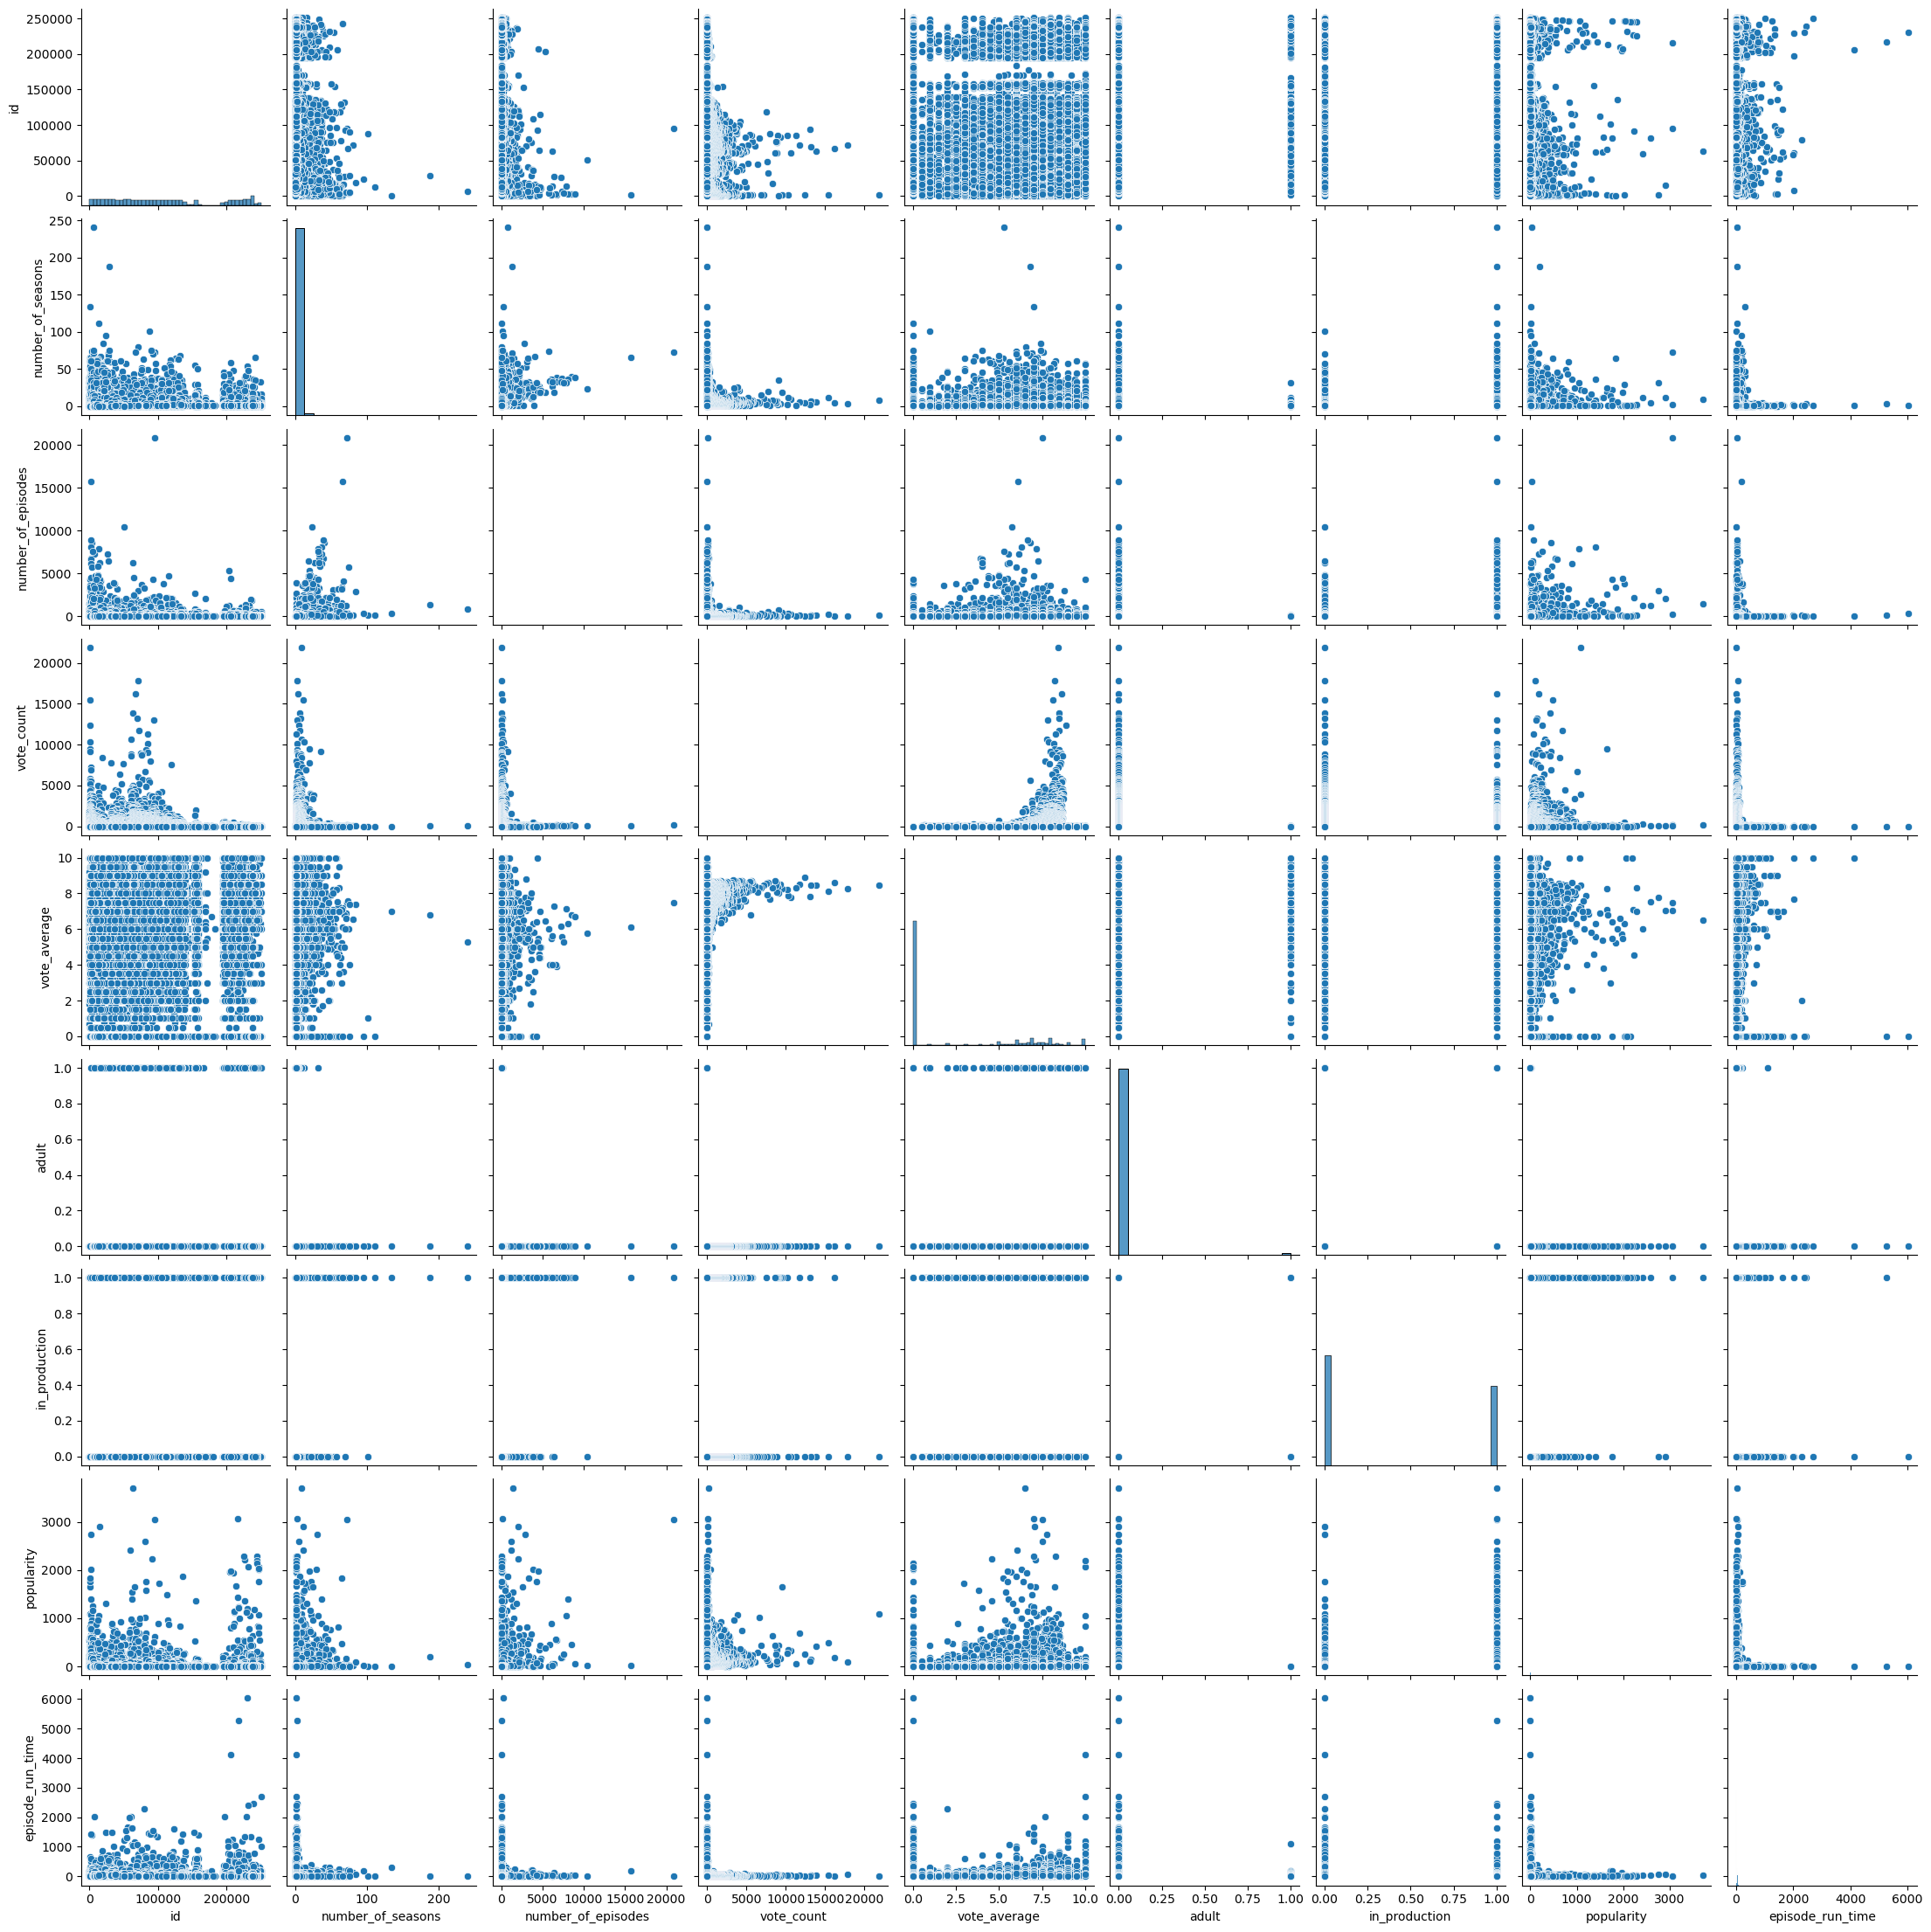

In [22]:
sns.pairplot(df_new)

<Axes: >

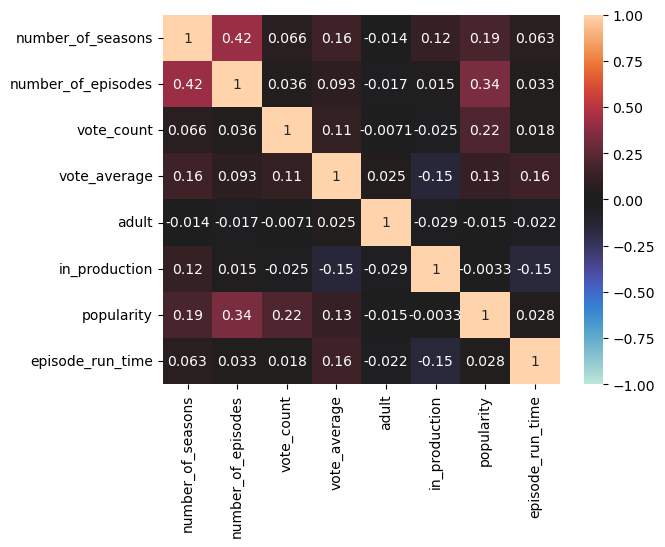

In [21]:
df_corr = df_new.drop(columns="id")
sns.heatmap(df_corr.corr(), annot= True, vmin=-1, vmax=1, center=0)